<h1 style= "color:#9370DB;"> Test </h1>

In [1]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# New liabraries. 
import scipy.stats as st

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

/opt/anaconda3/envs/streamlit-stock/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2 style="color: #4C9F70;"> 01 | Data Extraction </h2>

In [2]:
data = pd.read_csv('plan_kaggle/sp500_stocks.csv')
sp = pd.read_csv('plan_kaggle/sp500_index.csv')
annual_returns = pd.read_csv('plan_kaggle/annual_returns.csv')

In [3]:
# Cleaning columns with snake_case 
data.columns = [col.lower().replace(" ", "_")for col in data.columns] 
sp.columns = [col.lower().replace(" ", "_")for col in sp.columns] 

<h3 style="color: #4682B4;">1.1 | Exploring the Data </h3>

In [4]:
data.sample(3)

,date,symbol,adj_close,close,high,low,open,volume
579275,2012-02-29,DOV,33.839378,42.914886,43.464561,42.700378,43.330498,1528040.0
1358791,2018-07-24,PLTR,NaN,NaN,NaN,NaN,NaN,NaN
543883,2020-11-06,DAL,30.933666,31.420000,31.840000,31.030001,31.670000,11821100.0


In [5]:
sp.sample(3)

,date,s&p500
400,2016-07-12,2152.14
152,2015-07-17,2126.64
553,2017-02-17,2351.16


In [6]:
annual_returns.sample(3)

,Unnamed: 0,symbol,year,annual_return
7095,7095,XEL,2020,0.0969
1326,1326,CI,2022,0.4382
5581,5581,QRVO,2024,-0.3726


In [7]:
data2 = data.copy()
annual_returns2 = annual_returns.copy()
sp2 = sp.copy()

<h2 style="color: #4C9F70;"> 02 | Data Cleaning </h2>

In [44]:
sp.dtypes

date       object
symbol     object
price     float64
dtype: object

<h3 style="color: #4682B4;"> 2.1 | Dealing with Data types</h3>

In [8]:
sp.dtypes

date       object
s&p500    float64
dtype: object

<h3 style="color: #4682B4;"> 2.2 | Dealing with NaN values</h3>

In [9]:
annual_returns2.isna().sum()

Unnamed: 0       0
symbol           0
year             0
annual_return    0
dtype: int64

In [10]:
sp.isna().sum()

date      0
s&p500    0
dtype: int64

In [11]:
data.isna().sum()

date              0
symbol            0
adj_close    101626
close        101626
high         101626
low          101626
open         101626
volume       101626
dtype: int64

In [12]:
# Delete NaN.
data2.dropna(how='any', inplace=True)

In [13]:
data2.isna().sum()

date         0
symbol       0
adj_close    0
close        0
high         0
low          0
open         0
volume       0
dtype: int64

In [14]:
# Use this as a reference conunting the same after dropping them that without droping them. 
data2.symbol.value_counts()

symbol
MMM     3758
MHK     3758
NTAP    3758
NDAQ    3758
MSCI    3758
        ... 
VLTO     297
SOLV     175
GEV      175
SW       108
AMTM      53
Name: count, Length: 503, dtype: int64

<h3 style="color: #4682B4;"> 2.3 | Dealing with Duplicates</h3>

In [15]:
data2.duplicated().sum()

np.int64(0)

In [16]:
annual_returns2.duplicated().sum()

np.int64(0)

In [17]:
sp.duplicated().sum()

np.int64(0)

<h3 style="color: #4682B4;"> 2.4 | Dealing with columns </h3

In [18]:
data2

,date,symbol,adj_close,close,high,low,open,volume
0,2010-01-04,MMM,43.783867,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.509628,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.126682,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.158325,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.469463,70.501671,70.501671,69.648827,69.974915,4073337.0
...,...,...,...,...,...,...,...,...
1890269,2024-12-02,ZTS,176.809998,176.809998,176.910004,173.729996,175.779999,2391500.0
1890270,2024-12-03,ZTS,176.940002,176.940002,181.399994,176.559998,176.710007,2679000.0
1890271,2024-12-04,ZTS,175.320007,175.320007,178.500000,174.539993,174.600006,2687000.0
1890272,2024-12-05,ZTS,174.770004,174.770004,176.529999,173.720001,175.270004,2442000.0


In [19]:
# Delete Columns 
data2.drop(columns=['high', 'low', 'open','close','volume'], inplace=True)

In [20]:
data2.rename(columns={'adj_close': 'price'}, inplace=True)


In [21]:
#Create new symbol. 
sp['symbol'] = 'SP500'


In [22]:
data2

,date,symbol,price
0,2010-01-04,MMM,43.783867
1,2010-01-05,MMM,43.509628
2,2010-01-06,MMM,44.126682
3,2010-01-07,MMM,44.158325
4,2010-01-08,MMM,44.469463
...,...,...,...
1890269,2024-12-02,ZTS,176.809998
1890270,2024-12-03,ZTS,176.940002
1890271,2024-12-04,ZTS,175.320007
1890272,2024-12-05,ZTS,174.770004


In [23]:
sp

,date,s&p500,symbol
0,2014-12-08,2060.31,SP500
1,2014-12-09,2059.82,SP500
2,2014-12-10,2026.14,SP500
3,2014-12-11,2035.33,SP500
4,2014-12-12,2002.33,SP500
...,...,...,...
2511,2024-11-29,6032.38,SP500
2512,2024-12-02,6047.15,SP500
2513,2024-12-03,6049.88,SP500
2514,2024-12-04,6086.49,SP500


In [24]:
sp.rename(columns={'s&p500': 'price'}, inplace=True)
cols = ['date', 'symbol', 'price']
sp[cols] = sp[cols]
sp.head()


,date,price,symbol
0,2014-12-08,2060.31,SP500
1,2014-12-09,2059.82,SP500
2,2014-12-10,2026.14,SP500
3,2014-12-11,2035.33,SP500
4,2014-12-12,2002.33,SP500


In [25]:
cols = ['date', 'symbol', 'price']
sp = sp[cols]
sp.head()

,date,symbol,price
0,2014-12-08,SP500,2060.31
1,2014-12-09,SP500,2059.82
2,2014-12-10,SP500,2026.14
3,2014-12-11,SP500,2035.33
4,2014-12-12,SP500,2002.33


In [26]:
sp.columns = ['date', 'symbol', 'price']

In [27]:
stock_df = pd.concat([data2, sp], axis=0, ignore_index=True)
stock_df

,date,symbol,price
0,2010-01-04,MMM,43.783867
1,2010-01-05,MMM,43.509628
2,2010-01-06,MMM,44.126682
3,2010-01-07,MMM,44.158325
4,2010-01-08,MMM,44.469463
...,...,...,...
1791159,2024-11-29,SP500,6032.380000
1791160,2024-12-02,SP500,6047.150000
1791161,2024-12-03,SP500,6049.880000
1791162,2024-12-04,SP500,6086.490000


In [28]:
# Change to datetime from stocks. 
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [29]:
stock_df['year'] = stock_df['date'].dt.year
stock_df['month'] = stock_df['date'].dt.month
stock_df['day'] = stock_df['date'].dt.day

In [30]:
# Creating new columns. Which will give us the annual return yearly per each stock & sp500. 
annual_returns = stock_df.groupby(['symbol', 'year']).apply(lambda group: (group['price'].iloc[-1] / group['price'].iloc[0]) - 1).reset_index(name='annual_return').round(4)

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_7015/3162761734.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_returns = stock_df.groupby(['symbol', 'year']).apply(lambda group: (group['price'].iloc[-1] / group['price'].iloc[0]) - 1).reset_index(name='annual_return').round(4)


In [31]:
# Drop rows where year is between 2010 and 2013 because SP500 for comparison we do have 2014. 
#data2.drop(data2[(data2['year'] >= 2010) & (data2['year'] <= 2014)].index, inplace=True)

annual_returns.drop(annual_returns[(annual_returns['year'] >= 2010) & (annual_returns['year'] <= 2013)].index, inplace=True)

In [32]:
annual_returns

,symbol,year,annual_return
4,A,2014,0.0254
5,A,2015,0.0418
6,A,2016,0.1319
7,A,2017,0.4535
8,A,2018,0.0072
...,...,...,...
7181,ZTS,2020,0.2409
7182,ZTS,2021,0.4999
7183,ZTS,2022,-0.3692
7184,ZTS,2023,0.3563


In [51]:
annual_returns

,symbol,year,annual_return
4,A,2014,0.0254
5,A,2015,0.0418
6,A,2016,0.1319
7,A,2017,0.4535
8,A,2018,0.0072
...,...,...,...
7181,ZTS,2020,0.2409
7182,ZTS,2021,0.4999
7183,ZTS,2022,-0.3692
7184,ZTS,2023,0.3563


In [33]:
annual_returns[annual_returns['symbol'] == "SP500"]

,symbol,year,annual_return
5943,SP500,2014,-0.0007
5944,SP500,2015,-0.0069
5945,SP500,2016,0.1124
5946,SP500,2017,0.1842
5947,SP500,2018,-0.0701
5948,SP500,2019,0.2871
5949,SP500,2020,0.1529
5950,SP500,2021,0.2879
5951,SP500,2022,-0.1995
5952,SP500,2023,0.2473


In [ ]:
# Saved as CSV. 
# annual_returns.to_csv('annual_returns.csv')

FUNCTION TO ADD. 

In [35]:
import matplotlib.pyplot as plt

def annual_return_plot(annual_returns, stock='SP500'):
    # Filter the DataFrame for both the selected symbol (stock) and SP500
    symbols_to_plot = annual_returns[annual_returns["symbol"].isin([stock, 'SP500'])]
    
    # If no data is found for the selected stock or SP500, print a warning and exit the function
    if symbols_to_plot.empty:
        print(f"⚠️ No data available for {stock} or SP500.")
        return
    
    # Pivot the DataFrame to structure it for plotting: 
    # Index will be the 'year', columns will be the 'symbol', and values will be the 'annual_return'
    df_pivot = symbols_to_plot.pivot(index="year", columns="symbol", values="annual_return")
    
    # Define custom colors: SP500 will always be red, and the selected stock will be blue
    colors = {'SP500': '#FF0000', stock: '#0000FF'}

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot the annual return data for the selected symbol and SP500 over the years
    for i, symbol in enumerate(df_pivot.columns):
        plt.plot(df_pivot.index, df_pivot[symbol], marker='o', label=symbol, color=colors[symbol])

    # Title and labels for the plot
    plt.title(f"Annual Return Comparison: {stock} vs SP500", fontsize=14, fontweight='bold', color="#5F9EA0")
    plt.xlabel("Year", fontsize=12, fontweight='bold', color="#1E90FF")
    plt.ylabel("Annual Return (%)", fontsize=12, fontweight='bold', color="#4682B4")
    plt.legend(title="Symbol", title_fontsize=12, fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()


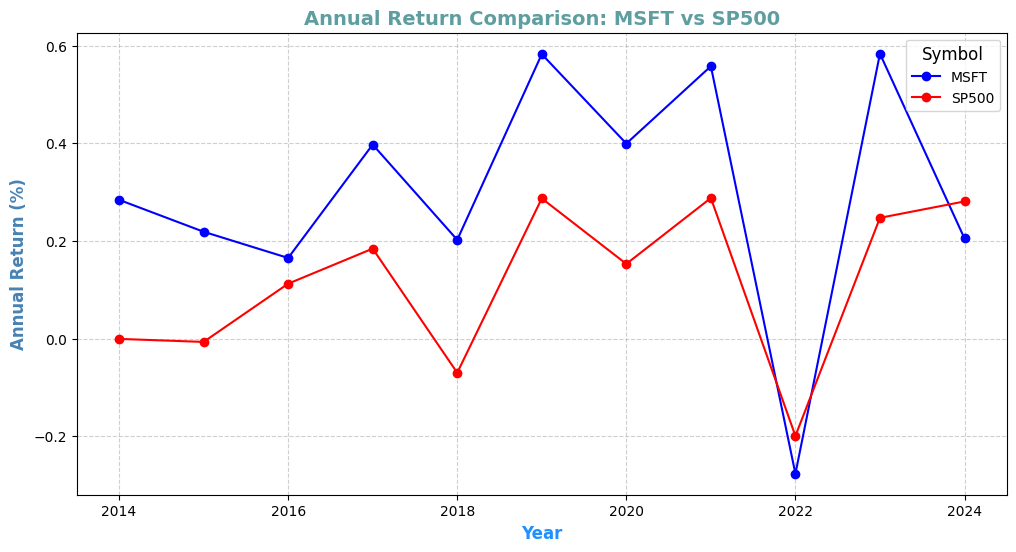

In [36]:
annual_return_plot(annual_returns, 'MSFT')

In [1]:
annual_returns2.drop('Unnamed: 0', axis=1, inplace=True)
annual_returns2

NameError: name 'annual_returns2' is not defined

In [ ]:
annual_returns2 = annual_returns.pivot(index='symbol', columns='year', values='annual_return')
annual_returns2

<h3 style="color: #4682B4;"> 2.5 | Moving target to the right </h3>

# <h2 style="color: #4C9F70;"> 03 | EDA (Exploratory Data Analysis) </h2>

<h3 style="color: #4682B4;">3.1 | Descriptive Statistics </h3>

In [53]:
info_df = pd.read_csv('plan_yahoo/extrainfo.csv')

In [54]:
info_df

,Unnamed: 0,currency,symbol,exchangeName,fullExchangeName,instrumentType,firstTradeDate,regularMarketTime,hasPrePostMarketData,gmtoffset,...,regularMarketPrice,fiftyTwoWeekHigh,fiftyTwoWeekLow,regularMarketDayHigh,regularMarketDayLow,regularMarketVolume,longName,shortName,chartPreviousClose,priceHint
0,0,USD,MMM,NYQ,NYSE,EQUITY,-252322200,1738962002,True,-18000,...,149.870,155.00,75.652,152.900,149.550,2741900,3M Company,3M Company,3.475,2
1,1,USD,AOS,NYQ,NYSE,EQUITY,433776600,1738962002,True,-18000,...,65.160,92.45,64.940,66.210,65.050,1175632,A. O. Smith Corporation,A.O. Smith Corporation,1.083,2
2,2,USD,ABT,NYQ,NYSE,EQUITY,322151400,1738962002,True,-18000,...,129.070,132.50,99.710,129.490,128.330,6234761,Abbott Laboratories,Abbott Laboratories,0.502,2
3,3,USD,ABBV,NYQ,NYSE,EQUITY,1357137000,1738962002,True,-18000,...,190.600,207.32,153.580,193.860,190.435,3787120,AbbVie Inc.,AbbVie Inc.,35.120,2
4,4,USD,ACN,NYQ,NYSE,EQUITY,995549400,1738962002,True,-18000,...,385.980,398.35,278.690,390.530,385.360,1734937,Accenture plc,Accenture plc,15.170,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,463,USD,XYL,NYQ,NYSE,EQUITY,1318512600,1739198273,True,-18000,...,131.295,146.08,113.260,131.945,131.040,152337,Xylem Inc.,Xylem Inc.,24.250,2
464,464,USD,YUM,NYQ,NYSE,EQUITY,874503000,1739198310,True,-18000,...,144.305,144.96,122.130,144.960,144.045,81579,"Yum! Brands, Inc.","Yum! Brands, Inc.",5.235,2
465,465,USD,ZBRA,NMS,NasdaqGS,EQUITY,682263000,1739198246,True,-18000,...,362.270,427.76,243.490,365.430,362.270,28886,Zebra Technologies Corporation,Zebra Technologies Corporation,4.056,2
466,466,USD,ZBH,NYQ,NYSE,EQUITY,996067800,1739198320,True,-18000,...,100.700,133.90,99.930,101.570,100.700,35930,"Zimmer Biomet Holdings, Inc.","Zimmer Biomet Holdings, Inc.",28.893,2


In [55]:
info_df.columns

Index(['Unnamed: 0', 'currency', 'symbol', 'exchangeName', 'fullExchangeName',
       'instrumentType', 'firstTradeDate', 'regularMarketTime',
       'hasPrePostMarketData', 'gmtoffset', 'timezone', 'exchangeTimezoneName',
       'regularMarketPrice', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow',
       'regularMarketDayHigh', 'regularMarketDayLow', 'regularMarketVolume',
       'longName', 'shortName', 'chartPreviousClose', 'priceHint'],
      dtype='object')

<h3 style="color: #4682B4;"> 3.2 | Univariate & Bivariate Analysis </h3>

<h4 style="color: #D2691E;"> 3.2.1 | Categorical Variables </h4>

In [ ]:
frequency_table = cat.sector.value_counts()
proportion_table = cat.sector.value_counts(normalize=True)

In [ ]:
frequency_proportion = pd.concat([frequency_table,proportion_table], axis = 1)
frequency_proportion.columns = ['absolute_frequency', 'relative_frequency']

In [ ]:
total_absolute = frequency_table.sum()
total_relative = proportion_table.sum()


In [ ]:
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])

In [ ]:
df3 = pd.concat([frequency_proportion, total_row])
df3

In [ ]:
sns.barplot(
    x='sector',
    y='absolute_frequency',
    data=frequency_proportion,
    palette='viridis',
)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The frequency table gives the count of each sector, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories. Such as:
- Technology: 16% 
- Industrials: 14% 
- Financial Services: 13% 
- Healthcare: 12% 
- Consumer Cyclical: 10% 

<h4 style="color: #D2691E;"> 3.2.2 | Numerical Variables </h4>

In [ ]:
definitive['currentprice'].describe()

**Insights** from Summary Statistics for `currentprice`:

- The average (**mean**) sale price of the stock in the dataset is approximately **$230.29**. This represents the central tendency of the prices.

- The **median** sale price is **$126.82**. Notably, the median is significantly lower than the mean, suggesting that the distribution of stock prices is skewed towards higher values (positively-skewed).

- The **standard deviation**, which measures the variation or spread of prices, is **$521.99**. This large value indicates a high level of variability in stock prices, suggesting that prices are widely dispersed from the mean.

- The **minimum** and **maximum** prices are **$8.56** and **$8946.33**, respectively. This extreme range highlights that the dataset includes stocks with both very low and very high prices.

- The **interquartile range (IQR)**, representing the middle 50% of the prices, lies between $71.54 (Q1) and $239.19 (Q3). This means that 50% of the stock prices fall within this range, providing a clearer picture of the typical stock price distribution without being influenced by outliers.

**Additional Note:**
The significant difference between the mean and median, combined with the large standard deviation, suggests the presence of outliers or high-value stocks that push the mean upwards. This highlights the importance of focusing on the IQR for understanding the core stock price range.

In [ ]:
definitive.currentprice.skew().round(2)

In [ ]:

definitive.currentprice.kurtosis().round(2)

In [ ]:
d2 = sns.displot(data=definitive, x='currentprice', kde=True, height=6, aspect=1.5, bins=100, binrange=(0, 2100), color='mediumpurple')
d2.set(xlabel='Current Price')
plt.xlim(0, 2100)

- Skewness of `currentprice`: \(11.81\)
- Kurtosis of `currentprice`: \(174.88\)

**Insights**:

1. **Skewness**: The positive value of skewness 11.81 for the 'currentprice' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of stocks that have higher prices, which are acting as outliers and pulling the mean upwards.
  
2. **Kurtosis**: The kurtosis value of 174.88 indicates that the 'currentprice' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'currentprice' than one would expect in a normally distributed set.

In [ ]:
sns.boxplot(data=num.currentprice)
plt.show()

In [ ]:
higher_price = definitive.sort_values(by='currentprice', ascending=False)
higher_price.head(4)

The box plot for 'currentprice' reveals 4 outstanding outliers that significantly exceed the upper range of typical values. These outliers are stock prices that are far above the third quartile (Q3), suggesting that while most prices fall within a relatively normal range, there are a few extreme high-value stocks.

Outliers are detected as values that lie beyond 1.5 times the interquartile range (IQR) above Q3. These extreme values can impact the overall analysis, particularly the mean and standard deviation, causing them to shift upwards.

- NVR, Inc: $8946.33

- Booking Holdings Inc.: $5300.34

- AutoZone Inc. :$3309.44

- Fair Isaac Corporation: $2371.83 


<h4 style="color: #D2691E;"> 3.2.3 | Numerical vs Categorical Variables </h4>

In [ ]:
# Found out in Kaggle related notebooks. 
f = {'revenuegrowth':['mean'], 'marketcap':['sum'], 'shortname':['count']}

sector_breakdown = definitive.groupby('sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('shortname', ascending=False)

fig = plt.figure(num=None, figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="shortname", y="sector", data=sector_breakdown, palette=('coolwarm'))
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('18')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="marketcap", y="sector", data=sector_breakdown, palette=('Wistia'))
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="revenuegrowth", y="sector", data=sector_breakdown, palette=('OrRd_r'))
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

In [ ]:
#Help from thisp part to display the market cap. 
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
market_bysector = definitive.groupby("sector")[["marketcap", "revenuegrowth"]].mean()
market_bysector.reset_index()

In [ ]:
sns.violinplot(data=definitive, x='sector', y='revenuegrowth', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
annual_returns = definitive.groupby('sector')[['ar_2015', 'ar_2016', 'ar_2017','ar_2018', 'ar_2019', 'ar_2020','ar_2021','ar_2022','ar_2023','ar_2024' ]].agg(['mean']).round(4)
annual_returns

In [ ]:
plt.figure(figsize=(9, 7)) 
sns.heatmap(annual_returns, annot=True, cmap="BuPu", fmt=".3f")
plt.show()

<h4 style="color: #D2691E;"> 3.2.4 | Continuous vs Continuous Variables </h4>

In [ ]:
sorted_df = defi.sort_values(by=2024, ascending=False)
sorted_df = sorted_df.reset_index()
sorted_df.columns.name = None
sorted_df.head(3)

In [ ]:
# Sampling with. 
sample_symbols = ['AMZN','PEP','NKE','SP500']
sample_df = sorted_df[sorted_df['symbol'].isin(sample_symbols)]
# Sampling with. 
sample_symbols1 = ['MSFT','PEP','NKE','SP500','JPM','XOM']
sample_df1 = sorted_df[sorted_df['symbol'].isin(sample_symbols1)]
# Sampling with. 
sample_symbols2 = ['AAPL','MA','WBA','MAR','PEP','SP500','JPM']
sample_df2 = sorted_df[sorted_df['symbol'].isin(sample_symbols2)]

In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return across different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df1.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return from different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df2.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return from different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()

<h3 style="color: #4682B4;"> 3.3 | Checking Distributions</h3>

In [ ]:
color = '#9370DB'

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #4682B4;"> 3.4 | Checking our target distribution</h3>

In [ ]:
# Without the filter 650.000 and taking out the outliers. 
sns.histplot(definitive["currentprice"], color=color, kde=True);

<h3 style="color: #4682B4;">3.5 | Looking for Correlations </h3>

In [ ]:
# Calculating the Pearson correlation coefficient between 'currentprice' and 'revenuegrowth'.
definitive['currentprice'].corr(definitive['revenuegrowth'])

In [ ]:
# Calculating the Spearman rank correlation between 'currentprice' and 'revenuegrowth'.
definitive['currentprice'].corr(definitive['revenuegrowth'], method='spearman')

- Pearson Correlation: \(0.0423\)
- Spearman Correlation: \(0.2741\)

**Insights:**

- The **Pearson correlation** of \(0.0423\) suggests a very weak positive linear relationship between currentprice and revenuegrowth. As revenuegrowth increases, currentprice does not show a strong linear increase.
  
- The **Spearman correlation** of \(0.2741\) indicates a weak positive monotonic relationship. This suggests that while higher revenuegrowth tends to correspond with higher currentprice, the relationship is not strongly linear or constant. 

The slightly higher value for Spearman correlation suggests that there might be some non-linear aspects to their relationship or the presence of outliers affecting the Pearson correlation.

In [ ]:
#pearson 
num.corrwith(definitive['currentprice']).sort_values(ascending=False)

In [ ]:
#Spearman
num.corrwith(df['currentprice'], method='spearman').sort_values(ascending=False)[:5]

Variables like `ar_2023`, `marketcap`, `weight`, and `ar_2020` have moderate positive correlations with `currentprice`, suggesting that as these variables increase, the currentprice tends to increase as well, but the relationship is not strong.

In [ ]:
num_corr = num.corr()
num_corr

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

<h3 style="color: #4682B4;">3.6 | Hypothesis Testing </h3>

<h4 style="color: #D2691E;"> 3.6.1 | Hypothesis 1 </h4>

We will use **one-way ANOVA** to determine if there is a statistically significant difference in **revenue growth** based on the **sector**.

#### Define Hypotheses
- **Null Hypothesis (H₀)**: There is no significant difference in the mean **revenue growth** between these five different sectors:
    - **Technology**
    - **Industrials**
    - **Finance Services** 
    - **Healthcare**
    - **Consumer Cyclical**
- **Alternative Hypothesis (H₁)**: There is a significant difference between these different sectors in the mean **revenue growth**. 

In [ ]:
# Extract revenuegrowth by sector.
tech_df = definitive[definitive['sector'] == 'Technology']['revenuegrowth']
indus_df = definitive[definitive['sector'] == 'Industrials']['revenuegrowth']
fin_df = definitive[definitive['sector'] == 'Financial Services']['revenuegrowth']
health_df = definitive[definitive['sector'] == 'Healthcare']['revenuegrowth']
consumer_df = definitive[definitive['sector'] == 'Consumer Cyclical']['revenuegrowth']

In [ ]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(tech_df, indus_df, fin_df, health_df, consumer_df)
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}") 
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: revenuegrowth has no significant difference between sectors.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in revenuegrowth between the sectors.")

**Observations** 

The ANOVA test results indicate that while the mean revenue growth differs across sectors these differences are not statistically significant at the alpha. 

<h4 style="color: #D2691E;"> 3.6.2 | Hypothesis 2 </h4>

**Has price a significant difference depending on the sector?**

- Null Hypothesis (H₀): There is **no** significant difference in the mean **price** between different sectors.
- Alternative Hypothesis (H₁): There is significant difference in the mean **price** between different sectors.

In [ ]:
# Extract currentprice by sector.
tech_df2 = definitive[definitive['sector'] == 'Technology']['currentprice']
indus_df2 = definitive[definitive['sector'] == 'Industrials']['currentprice']
fin_df2 = definitive[definitive['sector'] == 'Financial Services']['currentprice']
health_df2 = definitive[definitive['sector'] == 'Healthcare']['currentprice']
consumer_df2 = definitive[definitive['sector'] == 'Consumer Cyclical']['currentprice']

In [ ]:
print(tech_df2.mean())
print(indus_df2.mean())
print(fin_df2.mean())
print(health_df2.mean())
print(consumer_df2.mean())

In [ ]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(tech_df2, indus_df2, fin_df2, health_df2, consumer_df2)
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}") 
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: Price has no significant difference between sectors.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in price between the sectors.")

**Observations** 

The ANOVA test indicates that while the mean current prices differ across the five sectors these differences are not statistically significant. The data doesn't provide strong enough evidence to suggest that sector has a meaningful effect on the differences in current prices. 

In [ ]:
definitive

In [ ]:
yahoo_df = pd.read_csv("yahoo_api.csv")

In [ ]:
yahoo_df

In [ ]:
df1 = pd.merge(definitive, yahoo_df, on='symbol')

In [ ]:
# If I run inner join we do have left 178 stocks. 
df1

In [ ]:
df2 = pd.merge(definitive, yahoo_df, on='symbol', how='outer')

In [ ]:
# If I do have outer join I do have left 825 stocks. 
df2

In [ ]:
df2.sample(10)

In [ ]:
# Selecting categorical columns. 
cat1 = df2.select_dtypes(exclude='number')
cat1.head(5)

In [ ]:
# Selecting categorical columns. 
num1 = df2.select_dtypes(include='number')
num1.head(5)

In [ ]:
num_corr2 = num1.corr()
num_corr2

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr2)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr2, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df2

In [ ]:
df2.isna().sum()